In [4]:
import pandas as pd
from textblob import TextBlob
from textblob import Word
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from matplotlib.pyplot import MultipleLocator
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

%matplotlib inline

In [5]:
# read data
dfbn = pd.read_csv('data/BreakingNews.csv')
dfcnn = pd.read_csv('data/cnn.csv')
dfnyt = pd.read_csv('data/NYT.csv')

df_dict = {}
df_dict['bn'] = dfbn
df_dict['cnn'] = dfcnn
df_dict['nyt'] = dfnyt

# text cleaning
stop = stopwords.words('english')
freq_remove = ['said', 'due', 'says', 'according', 'number', 'two', 'state', 'u', 'say']

for df in df_dict:
    # to lower case
    df_dict[df]['text'] = (df_dict[df]['text']
                           .apply(lambda x: " ".join(x.lower() for x in x.split())))
    
    # remove punctuation
    df_dict[df]['text'] = df_dict[df]['text'].str.replace('[^\w\s]','')
    
    # remove stopwords
    df_dict[df]['text'] = (df_dict[df]['text']
                           .apply(lambda x: " ".join(x for x in x.split() if x not in stop)))
    
    # lemmatization, convert word into its root word
    df_dict[df]['text'] = (df_dict[df]['text']
                           .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])))
    
    # remove useless frequently occuring words
    df_dict[df]['text'] = df_dict[df]['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_remove))
    
    
    # 30 most rare words
    freq_rare = pd.Series(' '.join(df_dict[df]['text']).split()).value_counts()[-30:]
    rare = list(freq_rare.index)
    df_dict[df]['text'] = df_dict[df]['text'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))

    
#     # check result
#     print(df_dict[df]['text'].head())
#     print("")
    

### Word Frequency

### Breaking News

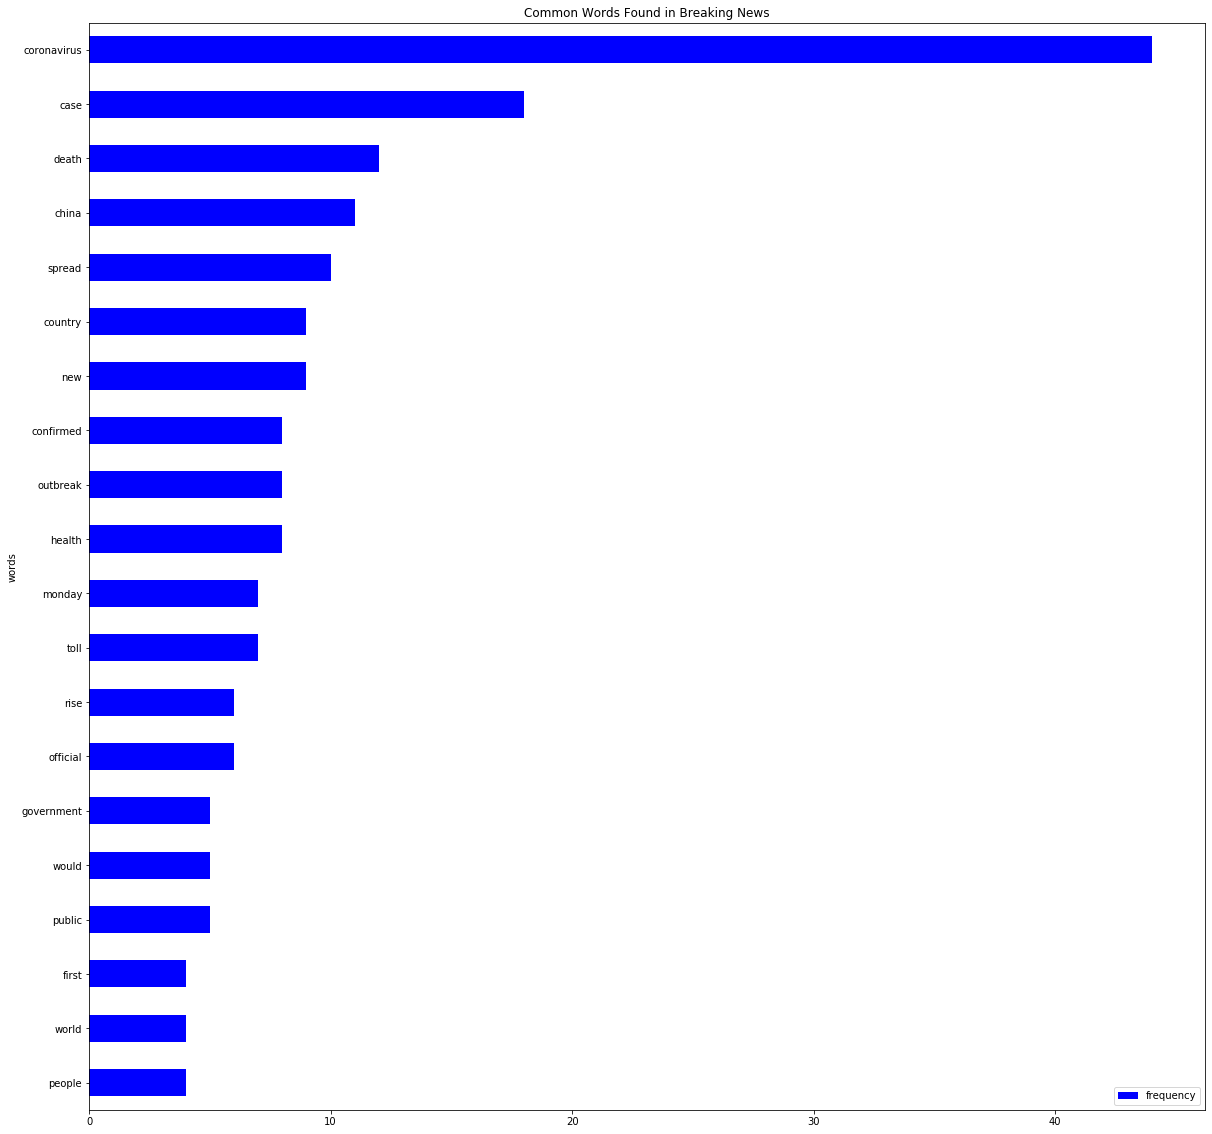

In [6]:
# Breaking News
tf_bn = (df_dict['bn']['text']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf_bn.columns = ['words','frequency']

# rearrange the list by frequency and select top 20 most frequenlty appering words.
tf_bn_sorted = tf_bn.sort_values(by=['frequency'], ascending = False)
tf_bn_sorted_20rows = tf_bn_sorted.head(n=20)

# plot our finding
fig, ax = plt.subplots(figsize=(20, 20))

# Plot horizontal bar graph
tf_bn_sorted_20rows.sort_values(by='frequency').plot.barh(x='words',
                      y='frequency',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in Breaking News")
plt.show()

### CNN

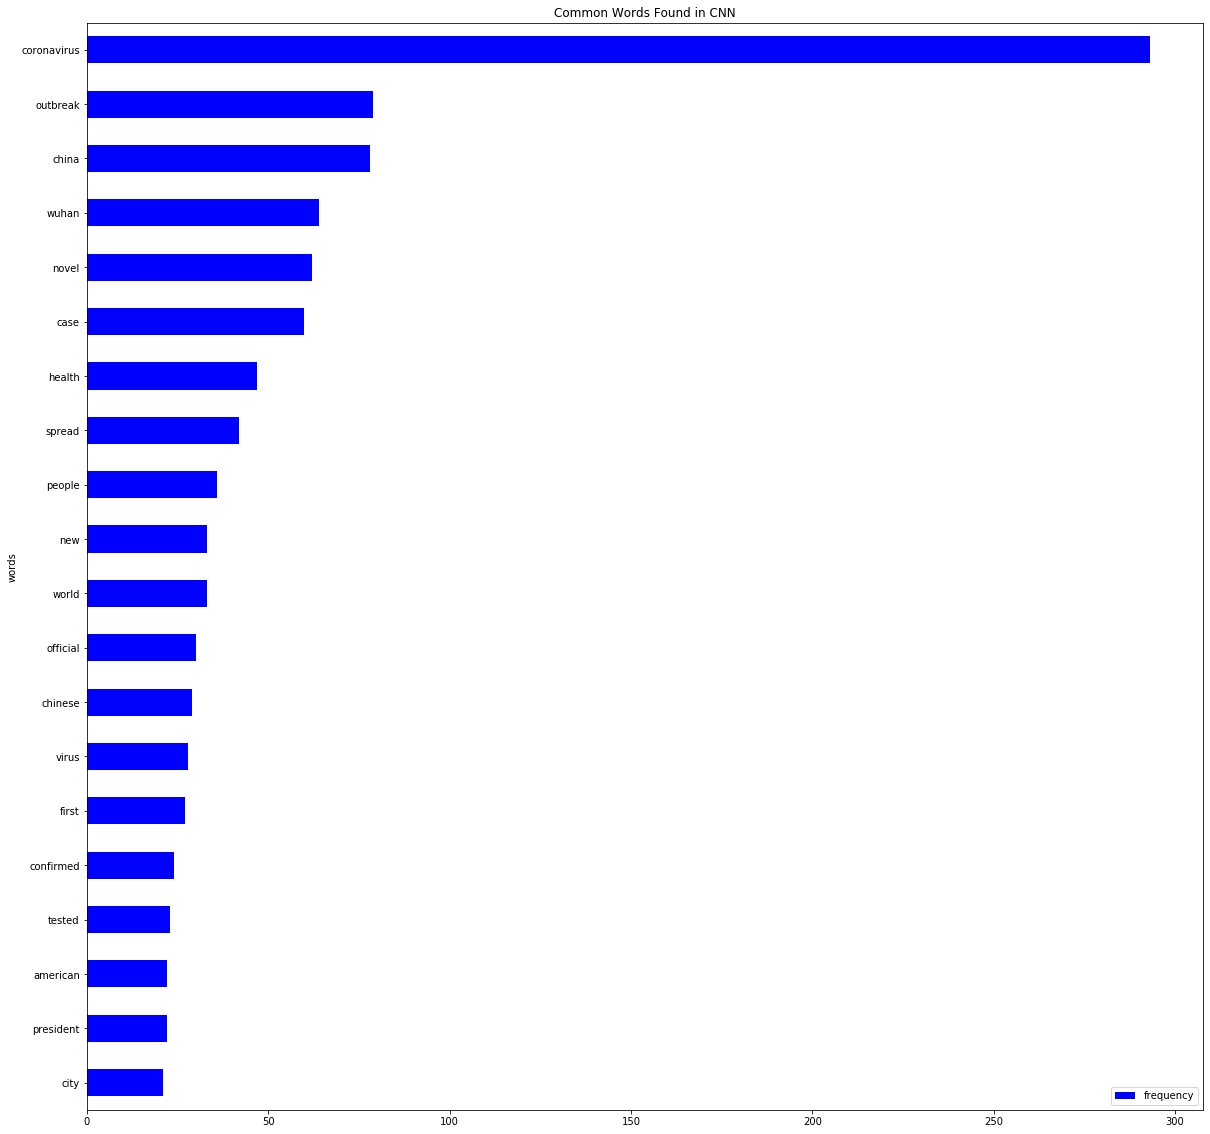

In [7]:
# CNN
tf_cnn = (df_dict['cnn']['text']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf_cnn.columns = ['words','frequency']

# rearrange the list by frequency and select top 20 most frequenlty appering words.
tf_cnn_sorted = tf_cnn.sort_values(by=['frequency'], ascending = False)
tf_cnn_sorted_20rows = tf_cnn_sorted.head(n=20)

# plot our finding
fig, ax = plt.subplots(figsize=(20, 20))

# Plot horizontal bar graph
tf_cnn_sorted_20rows.sort_values(by='frequency').plot.barh(x='words',
                      y='frequency',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in CNN")
plt.show()

### NYT

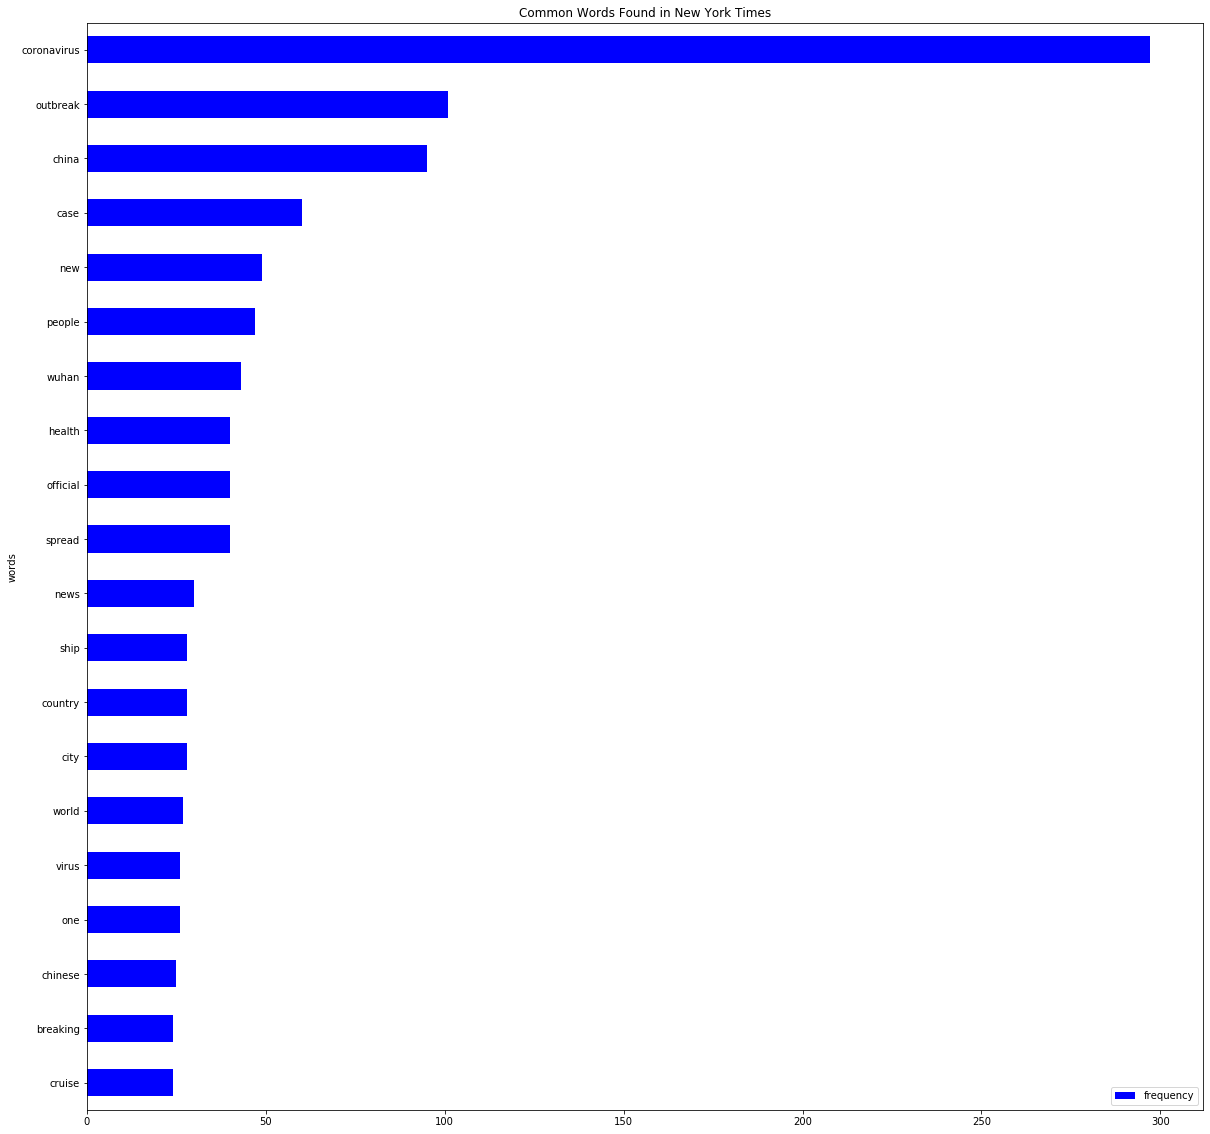

In [8]:
# New York Times
tf_nyt = (df_dict['nyt']['text']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf_nyt.columns = ['words','frequency']

# rearrange the list by frequency and select top 20 most frequenlty appering words.
tf_nyt_sorted = tf_nyt.sort_values(by=['frequency'], ascending = False)
tf_nyt_sorted_20rows = tf_nyt_sorted.head(n=20)

# plot our finding
fig, ax = plt.subplots(figsize=(20, 20))

# Plot horizontal bar graph
tf_nyt_sorted_20rows.sort_values(by='frequency').plot.barh(x='words',
                      y='frequency',
                      ax=ax,
                      color="blue")

ax.set_title("Common Words Found in New York Times")
plt.show()

### Word Cloud

### Breaking News

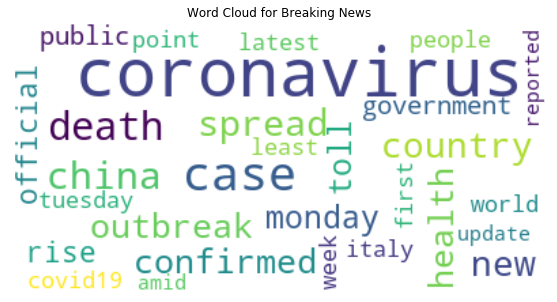

In [9]:
# Breaking News
plt.rcParams['figure.figsize'] = [20, 5]

# 30 most frequently occurring words
freq = pd.Series(' '.join(df_dict['bn']['text']).split()).value_counts()[:30]
freq_bn = pd.DataFrame(freq).reset_index().rename(columns={'index': 'word', '0': 'freq'})

text = ""
for row in freq_bn.itertuples():
    t = " ".join([row[1]]*row[2])
    text += t + " "

# create and generate a word cloud image: 
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", collocations=False).generate(text)

# display the generated image: 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.title('Word Cloud for Breaking News')
plt.show()

### CNN

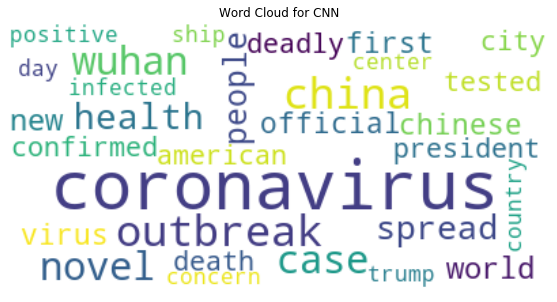

In [10]:
# CNN
plt.rcParams['figure.figsize'] = [20, 5]

# 30 most frequently occurring words
freq = pd.Series(' '.join(df_dict['cnn']['text']).split()).value_counts()[:30]
freq_cnn = pd.DataFrame(freq).reset_index().rename(columns={'index': 'word', '0': 'freq'})

text = ""
for row in freq_cnn.itertuples():
    t = " ".join([row[1]]*row[2])
    text += t + " "

# create and generate a word cloud image: 
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", collocations=False).generate(text)

# display the generated image: 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.title('Word Cloud for CNN')
plt.show()

### NYT

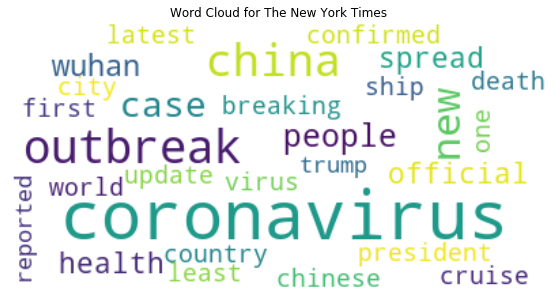

In [11]:
# New York Times
plt.rcParams['figure.figsize'] = [20, 5]

# 30 most frequently occurring words
freq = pd.Series(' '.join(df_dict['nyt']['text']).split()).value_counts()[:30]
freq_nyt = pd.DataFrame(freq).reset_index().rename(columns={'index': 'word', '0': 'freq'})

text = ""
for row in freq_nyt.itertuples():
    t = " ".join([row[1]]*row[2])
    text += t + " "

# create and generate a word cloud image: 
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", collocations=False).generate(text)

# display the generated image: 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.title('Word Cloud for The New York Times')
plt.show()

## Sentiment Analysis

In [12]:
# sentiment analysis
source = []
time = []
polarity = []
subjectivity = []

for df in df_dict:
    for row in df_dict[df].itertuples():
        src = row[3]
        t = row[7]
        pol = TextBlob(row[9]).sentiment[0]
        sub = TextBlob(row[9]).sentiment[1]
        
        source.append(src)
        time.append(t)
        polarity.append(pol)
        subjectivity.append(sub)

# sentimen analysis result
senti = pd.DataFrame(data={'Source': source, 
                           'Time': time, 
                           'Polarity': polarity, 
                           'Subjectivity': subjectivity})

# subset result for each agency
bn = senti.loc[senti['Source'] == 'Breaking News'].sort_values(by='Time')
cnn = senti.loc[senti['Source'] == 'CNN'].sort_values(by='Time')
nyt = senti.loc[senti['Source'] == 'The New York Times'].sort_values(by='Time')

### Breaking News

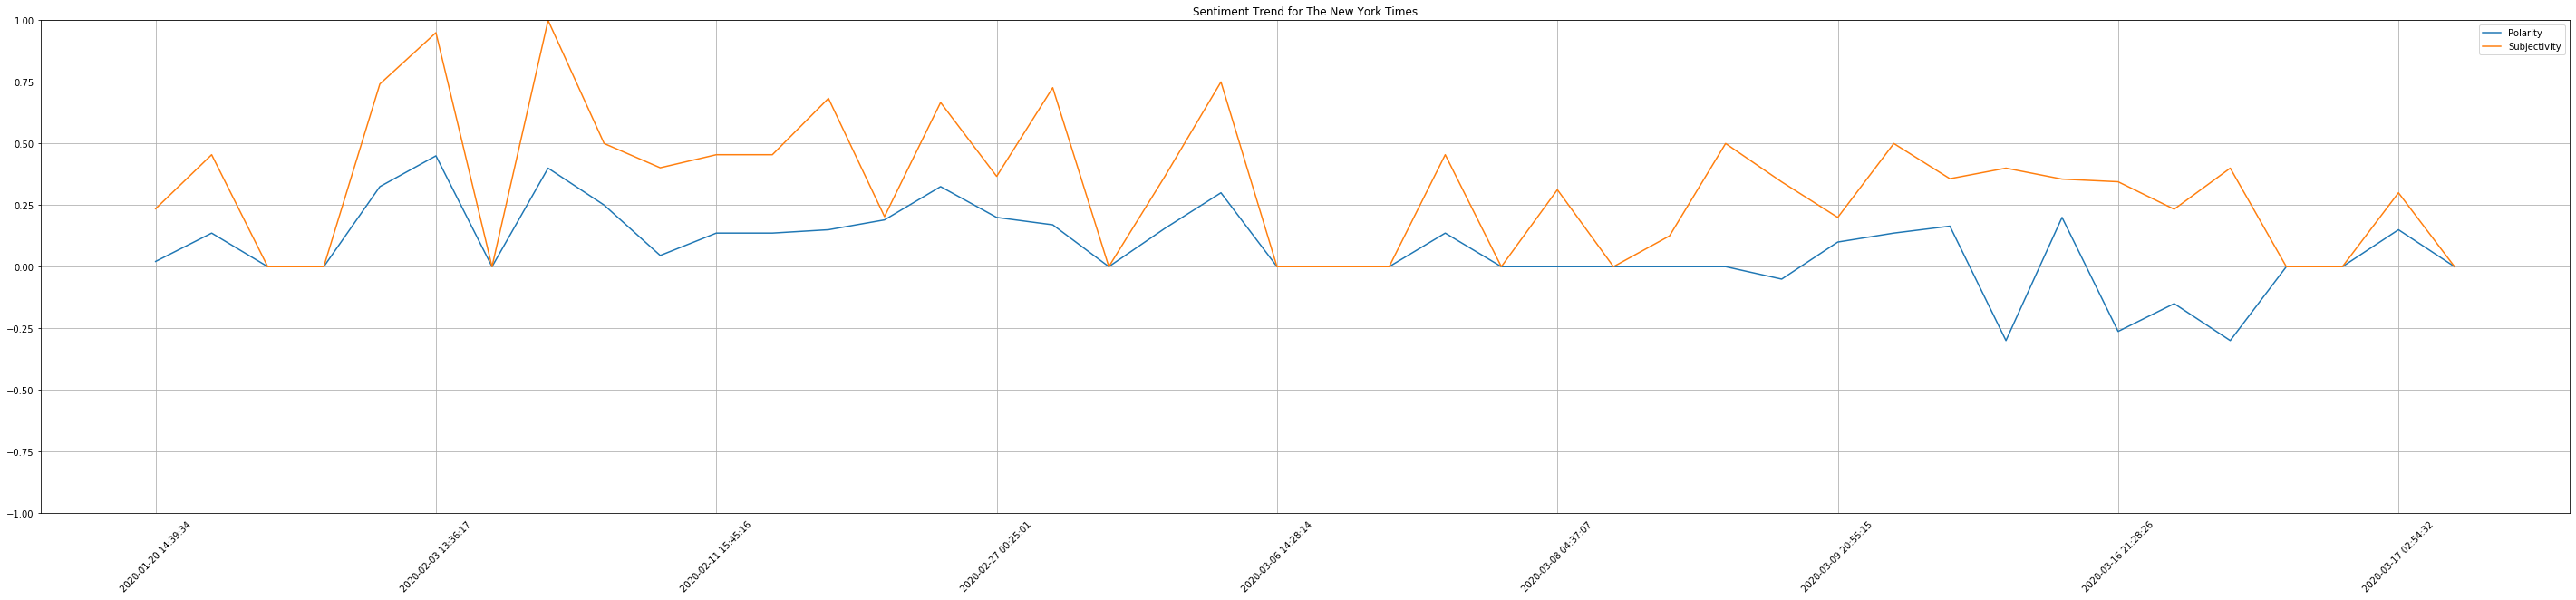

In [14]:
# plot line graph for Breaking News
plt.rcParams['figure.figsize'] = [50, 10]

plt.plot('Time', 'Polarity', data=bn)
plt.plot('Time', 'Subjectivity', data=bn)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax=plt.gca()
x_major_locator=MultipleLocator(5)
ax.xaxis.set_major_locator(x_major_locator)
plt.xticks(rotation=45)
plt.ylim(-1, 1)
plt.legend()
plt.grid()
plt.title('Sentiment Trend for The New York Times')
plt.show()

### CNN

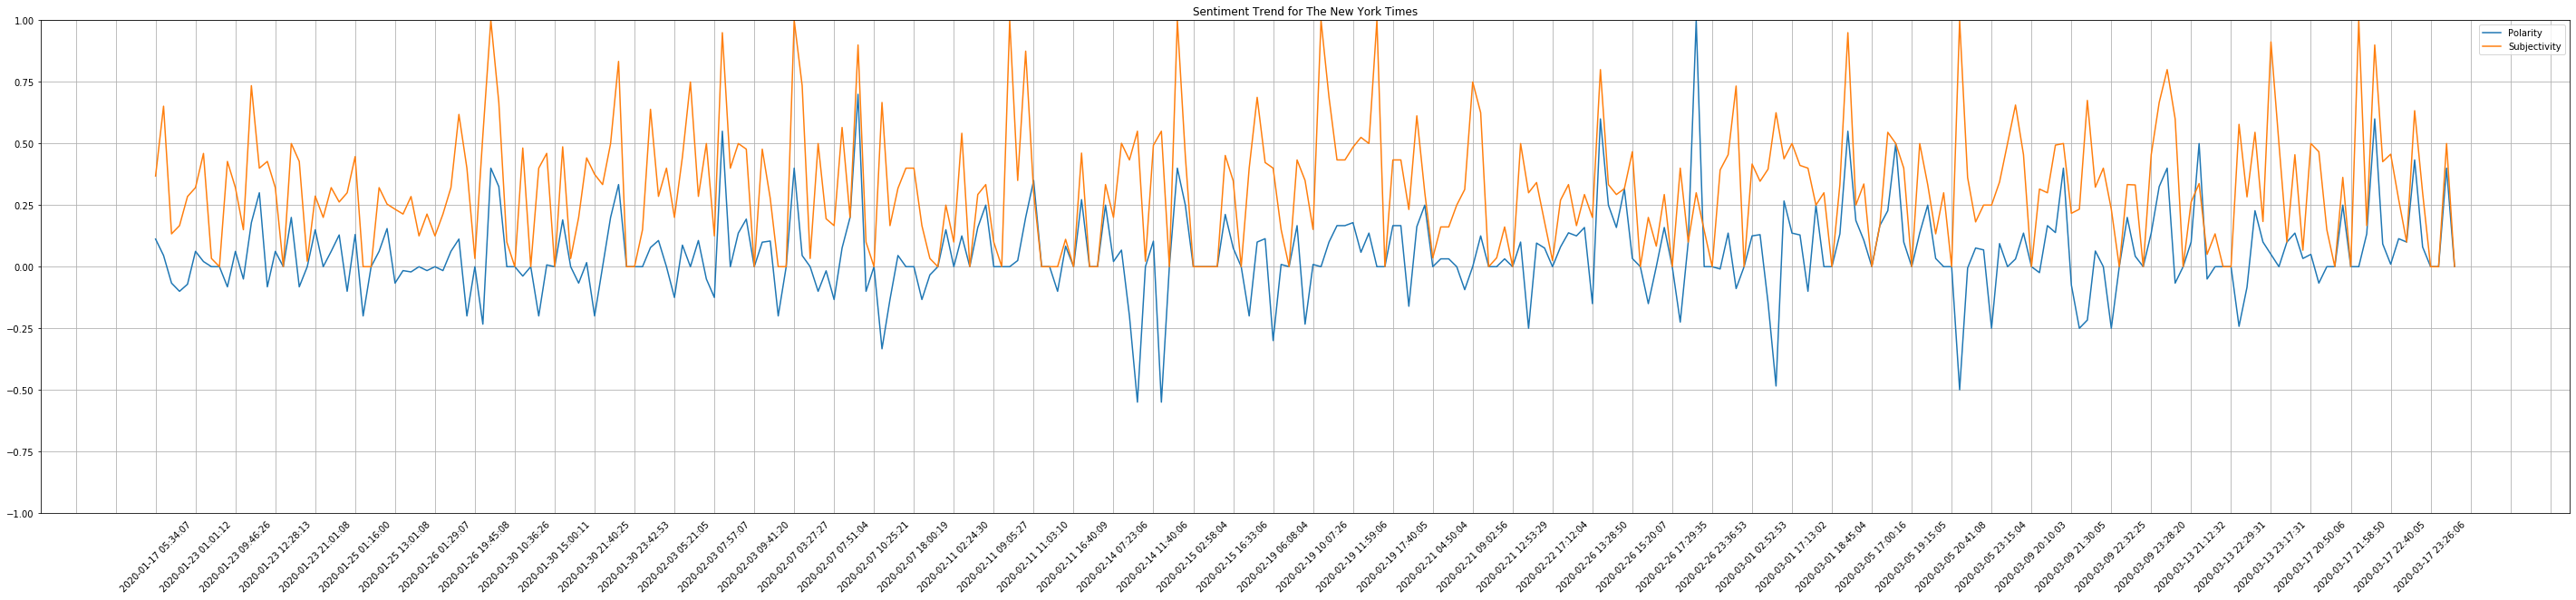

In [80]:
# plot line graph for CNN 
plt.rcParams['figure.figsize'] = [50, 10]

plt.plot('Time', 'Polarity', data=cnn)
plt.plot('Time', 'Subjectivity', data=cnn)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax=plt.gca()
x_major_locator=MultipleLocator(5)
ax.xaxis.set_major_locator(x_major_locator)
plt.xticks(rotation=45)
plt.ylim(-1, 1)
plt.legend()
plt.grid()
plt.title('Sentiment Trend for The New York Times')
plt.show()

### NYT

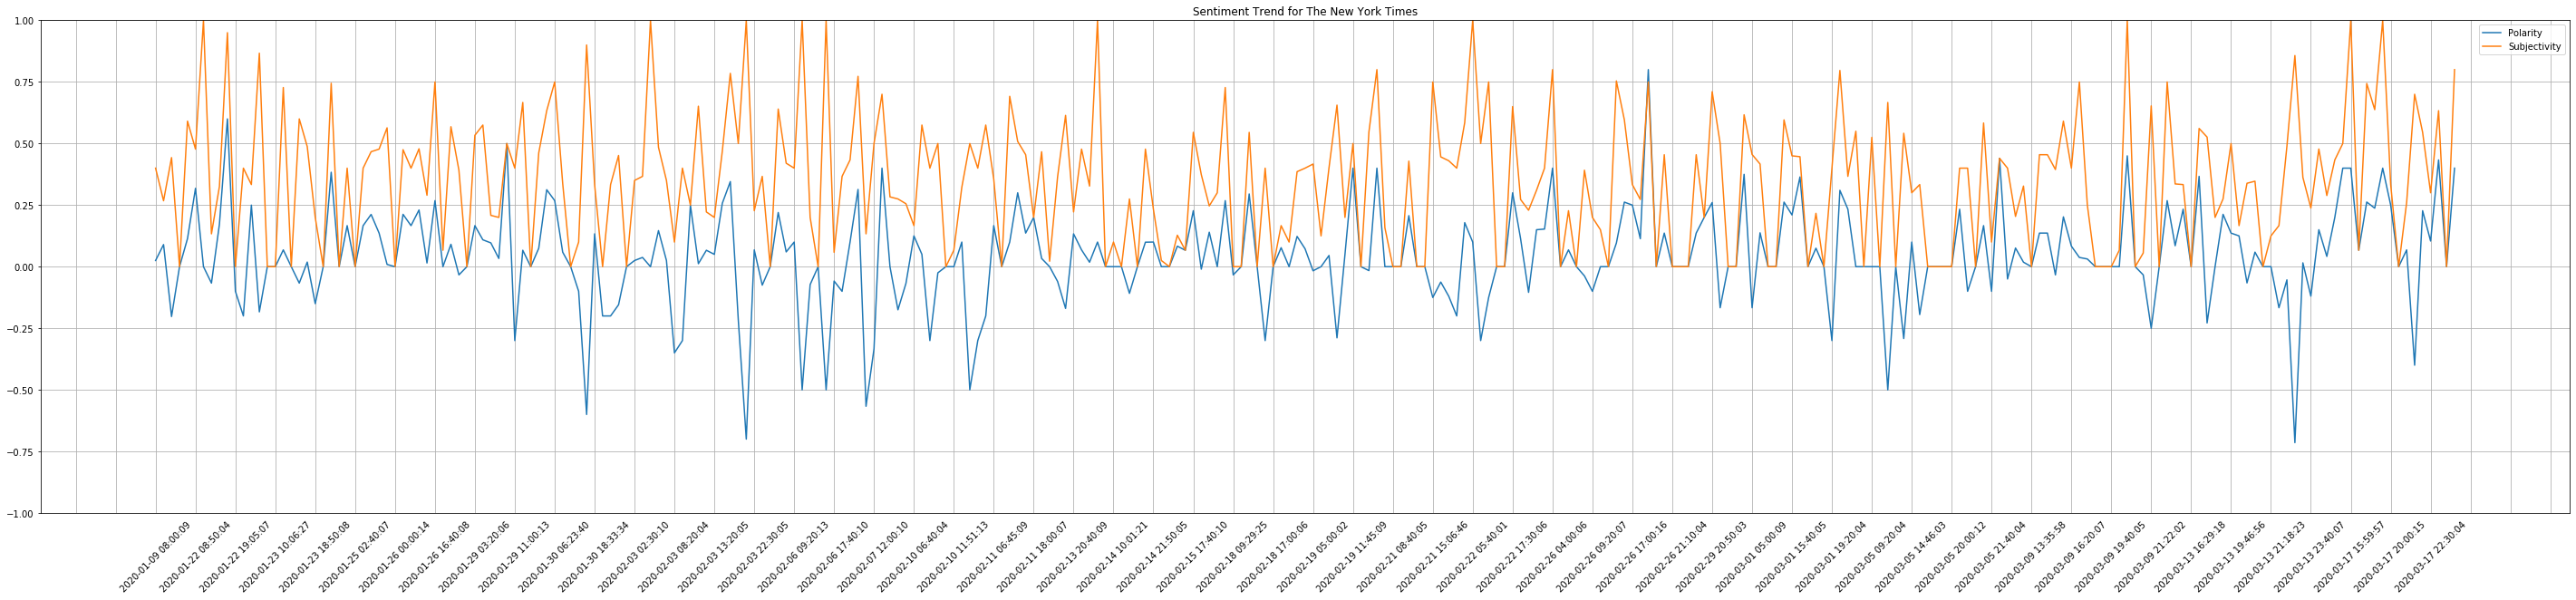

In [81]:
# plot line graph for The New York Times 
plt.rcParams['figure.figsize'] = [50, 10]

plt.plot('Time', 'Polarity', data=nyt)
plt.plot('Time', 'Subjectivity', data=nyt)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax=plt.gca()
x_major_locator=MultipleLocator(5)
ax.xaxis.set_major_locator(x_major_locator)
plt.xticks(rotation=45)
plt.ylim(-1, 1)
plt.legend()
plt.grid()
plt.title('Sentiment Trend for The New York Times')
plt.show()

## N-gram analysis with N = 2

In [82]:
def CountFrequency(my_list): 
      
    # Creating an empty dictionary  
    freq = {} 
    for items in my_list: 
        freq[items] = my_list.count(items) 
      
    for key, value in freq.items():  
        return freq

### Breaking News

In [83]:
# Breaking News
n_gram_bn = []

for k in range(df_dict['bn']['text'].size):
    for i in range(len(TextBlob(df_dict['bn']['text'][k]).ngrams(2))):
            n_gram_bn += [','.join(TextBlob(df_dict['bn']['text'][k]).ngrams(2)[i])]

# add the frequency to a dictionary
dict_bn = CountFrequency(n_gram_bn)

# convert dictionary to a dataframe and transpose it
dict_bn = pd.DataFrame(dict_bn, ['count'] ).T

# sort it by frequency and in decending order
dict_bn_sorted = dict_bn.sort_values(by = ['count'], ascending = False)

dict_bn_sorted.head(20)

,count
"spread,coronavirus",8
"death,toll",7
"coronavirus,death",4
"coronavirus,case",4
"toll,rise",4
"confirmed,case",4
"public,health",4
"slow,spread",3
"new,case",3
"coronavirus,outbreak",3


### CNN

In [84]:
n_gram_cnn = []

for k in range(df_dict['cnn']['text'].size):
    for i in range(len(TextBlob(df_dict['cnn']['text'][k]).ngrams(2))):
            n_gram_cnn += [','.join(TextBlob(df_dict['cnn']['text'][k]).ngrams(2)[i])]

# add the frequency to a dictionary
dict_cnn = CountFrequency(n_gram_cnn)

# convert dictionary to a dataframe and transpose it
dict_cnn = pd.DataFrame(dict_cnn, ['count'] ).T

# sort it by frequency and in decending order
dict_cnn_sorted = dict_cnn.sort_values(by = ['count'], ascending = False)

dict_cnn_sorted.head(20)

,count
"novel,coronavirus",61
"coronavirus,outbreak",54
"wuhan,coronavirus",44
"tested,positive",18
"cruise,ship",13
"coronavirus,case",13
"president,trump",13
"world,health",10
"coronavirus,pandemic",10
"health,organization",10


### NYT

In [85]:
n_gram_nyt = []

for k in range(df_dict['nyt']['text'].size):
    for i in range(len(TextBlob(df_dict['nyt']['text'][k]).ngrams(2))):
            n_gram_nyt += [','.join(TextBlob(df_dict['nyt']['text'][k]).ngrams(2)[i])]

# add the frequency to a dictionary
dict_nyt = CountFrequency(n_gram_nyt)

# convert dictionary to a dataframe and transpose it
dict_nyt = pd.DataFrame(dict_nyt, ['count'] ).T

# sort it by frequency and in decending order
dict_nyt_sorted = dict_nyt.sort_values(by = ['count'], ascending = False)

dict_nyt_sorted.head(20)

,count
"coronavirus,outbreak",62
"breaking,news",23
"cruise,ship",21
"new,york",16
"president,trump",15
"new,coronavirus",14
"coronavirus,case",14
"health,official",13
"spread,coronavirus",13
"case,coronavirus",12
